In [1]:
import torch
from torch import nn, optim

from src.data.helicopter import get_helicopter_dataloaders
from src.models.transformer import CustomTransformer
from src.training.helicopter import train_helicopter

train_data, valid_data = get_helicopter_dataloaders(batch_size=32, shuffle=True)

model = CustomTransformer(max_seq_len=512, d_model=64, num_layers=3, nhead=8, dim_feedforward=128).to("cuda")

# optimizer = optim.SGD(model.parameters(), lr=0.01)
optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.95)

train_helicopter(
    train_data=train_data, 
    valid_data=valid_data, 
    model=model, 
    optimizer=optimizer, 
    scheduler=scheduler, 
    mask_strategy="random noise",
    loss_strategy="complete",
    random_mask_prop=0.40, 
    noise_std=0.05,
    epochs=30, 
    checkpoints=2,
    save_prefix="Morvan2022",
    device="cuda")


c:\Users\maxho\anaconda3\envs\transformer-anomaly-detection\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Epoch 1:


Validating ...: 100%|██████████| 2228/2228 [00:54<00:00, 40.78it/s]


Epoch 1/30, Train loss: 8.142582620940199e-05, Valid loss: 8.996620168804905e-05
Epoch 2:


Validating ...: 100%|██████████| 2228/2228 [00:54<00:00, 40.71it/s]


Epoch 2/30, Train loss: 4.6137646737651384e-05, Valid loss: 8.193313533635695e-05
Epoch 3:


Validating ...: 100%|██████████| 2228/2228 [00:54<00:00, 40.69it/s]


Epoch 3/30, Train loss: 4.411861477197131e-05, Valid loss: 6.919857122066225e-05
Epoch 4:


Validating ...: 100%|██████████| 2228/2228 [00:55<00:00, 40.48it/s]


Epoch 4/30, Train loss: 4.312312192576703e-05, Valid loss: 7.410566178946176e-05
Epoch 5:


Validating ...: 100%|██████████| 2228/2228 [00:55<00:00, 40.43it/s]


Epoch 5/30, Train loss: 4.209900224763978e-05, Valid loss: 7.408333232467702e-05
Epoch 6:


Validating ...: 100%|██████████| 2228/2228 [00:55<00:00, 40.46it/s]


Epoch 6/30, Train loss: 4.1126839225723764e-05, Valid loss: 6.866926450426581e-05
Epoch 7:


Validating ...: 100%|██████████| 2228/2228 [00:55<00:00, 40.35it/s]


Epoch 7/30, Train loss: 3.9530390993136816e-05, Valid loss: 7.373917530114134e-05
Epoch 8:


Validating ...: 100%|██████████| 2228/2228 [00:55<00:00, 40.31it/s]


Epoch 8/30, Train loss: 3.819568654469727e-05, Valid loss: 6.316934482307632e-05
Epoch 9:


Validating ...: 100%|██████████| 2228/2228 [00:54<00:00, 40.64it/s]


Epoch 9/30, Train loss: 3.712935555538674e-05, Valid loss: 7.581596869360457e-05
Epoch 10:


Validating ...: 100%|██████████| 2228/2228 [00:54<00:00, 40.62it/s]


Epoch 10/30, Train loss: 3.618882925854876e-05, Valid loss: 7.161728802219914e-05
Epoch 11:


Validating ...: 100%|██████████| 2228/2228 [00:54<00:00, 40.59it/s]


Epoch 11/30, Train loss: 3.549118766735068e-05, Valid loss: 6.818958733483781e-05
Epoch 12:


Validating ...: 100%|██████████| 2228/2228 [00:54<00:00, 40.61it/s]


Epoch 12/30, Train loss: 3.507205733976515e-05, Valid loss: 7.097308230497504e-05
Epoch 13:


Validating ...: 100%|██████████| 2228/2228 [00:54<00:00, 40.58it/s]


Epoch 13/30, Train loss: 3.468750350354445e-05, Valid loss: 6.514739129348949e-05
Epoch 14:


Validating ...: 100%|██████████| 2228/2228 [00:54<00:00, 40.59it/s]


Epoch 14/30, Train loss: 3.448265308551585e-05, Valid loss: 6.854558938218691e-05
Epoch 15:


Validating ...: 100%|██████████| 2228/2228 [00:54<00:00, 40.60it/s]


Epoch 15/30, Train loss: 3.4258244059527026e-05, Valid loss: 6.418330796762222e-05
Epoch 16:


Training ...:   2%|▏         | 110/6289 [00:09<08:43, 11.81it/s]


KeyboardInterrupt: 

In [14]:
import torch
# from torch import nn
from src.data.helicopter import get_helicopter_dataloaders
# from src.models.transformer import CustomTransformer
from src.plotting import plot_attention_weights

train_data, valid_data = get_helicopter_dataloaders(batch_size=32, shuffle=True)


for batch in valid_data:
    batch = batch.to("cuda")
    break

mask = (torch.FloatTensor(batch.shape).uniform_() > 1.4).to("cuda")
noise = (torch.randn_like(batch) * 0.05).to("cuda")

model = torch.load("Morvan2022-helicopter-random noise-complete-4.save")
# model = CustomTransformer(max_seq_len=512, d_model=512).to("cuda")

pred_batch, layer_attn_weights = model(batch + (mask*noise))

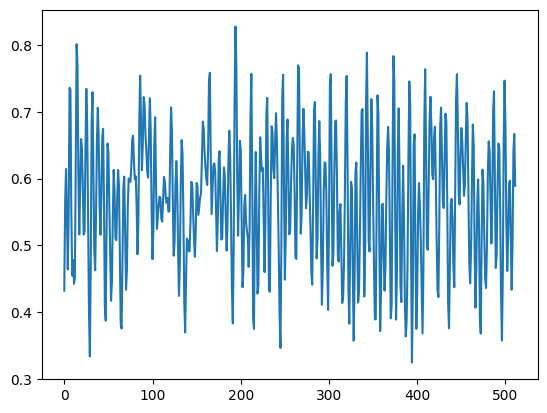

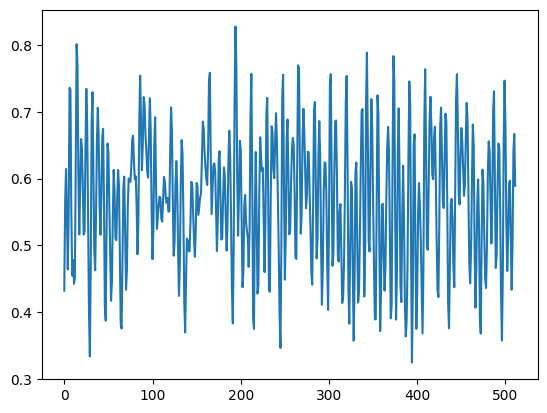

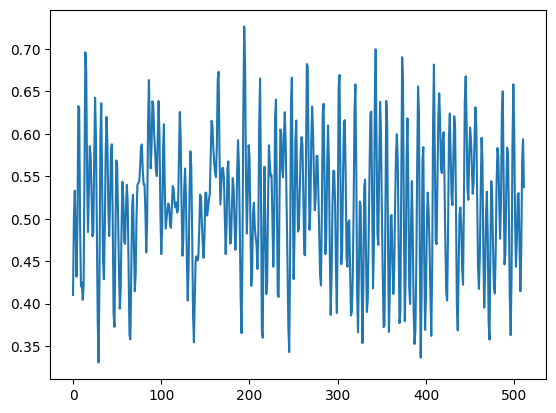

In [17]:
import matplotlib.pyplot as plt

idx = 6

plt.plot((batch).cpu().detach()[idx])
plt.show()
plt.plot((batch + mask*noise).cpu().detach()[idx])
plt.show()
plt.plot((pred_batch).cpu().detach()[idx])
plt.show()

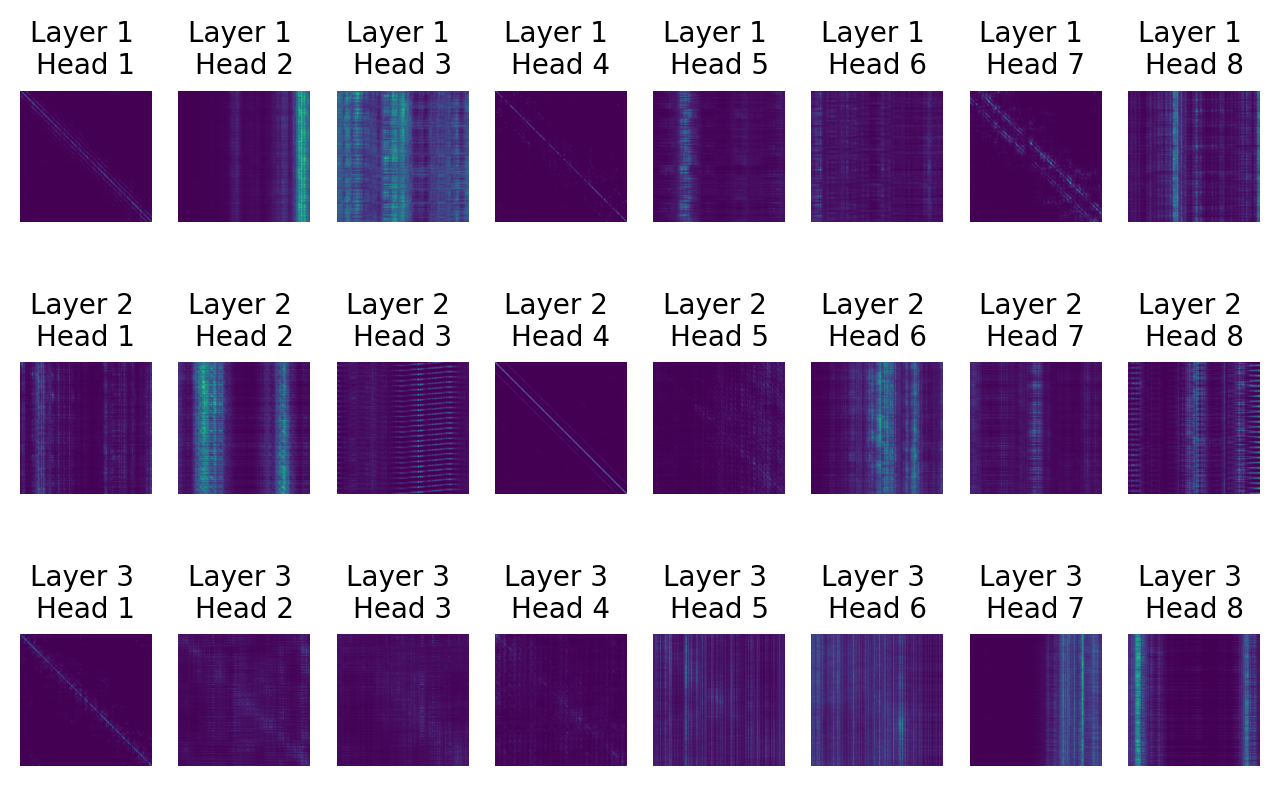

In [19]:
plot_attention_weights(layer_attn_weights.cpu().detach().numpy(), 6)